In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import mctspy as mct

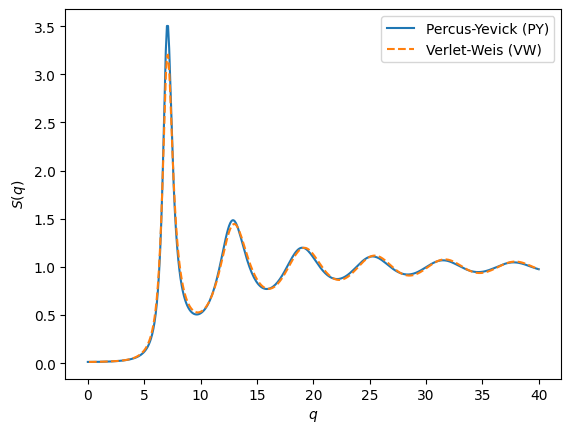

In [3]:
pySq = mct.structurefactors.hssPY(0.515)
vwSq = mct.structurefactors.hssVW(0.515)
qgrid = np.linspace(0.,40,400)
sq, cq = pySq.Sq(qgrid)
sqvw, cqvw = vwSq.Sq(qgrid[1:])
plt.plot(qgrid,sq,label='Percus-Yevick (PY)')
plt.plot(qgrid[1:],sqvw,linestyle='dashed',label='Verlet-Weis (VW)')
plt.xlabel(r'$q$')
plt.ylabel(r'$S(q)$')
plt.legend()
plt.show()

In [4]:
dcq = pySq.dcq_dq(qgrid)

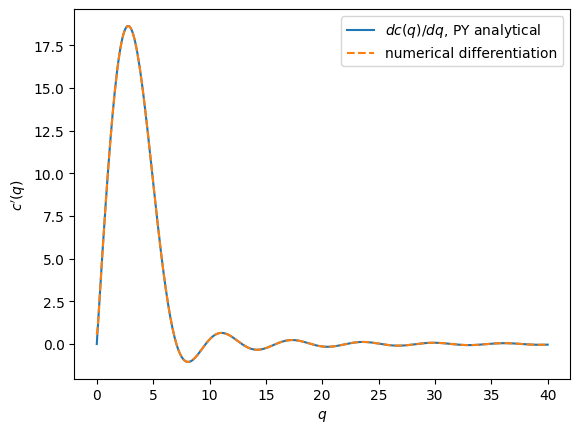

In [5]:
plt.plot(qgrid,dcq,label=r'$dc(q)/dq$, PY analytical')
plt.plot(qgrid,np.gradient(cq,qgrid),label=r'numerical differentiation',linestyle='dashed')
plt.xlabel(r'$q$')
plt.ylabel(r"$c'(q)$")
plt.legend()
plt.show()

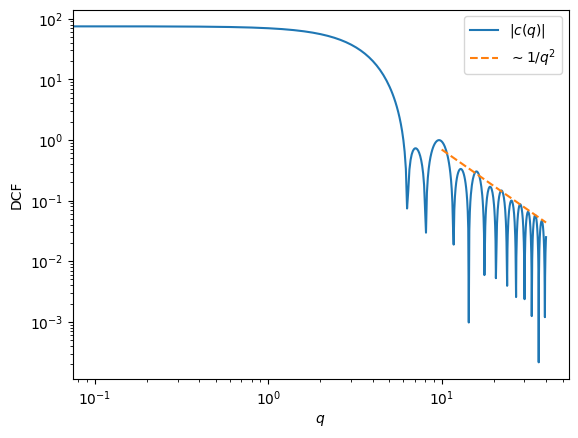

In [6]:
plt.plot(qgrid,np.abs(cq),label=r'$|c(q)|$')
q2=np.linspace(10,40,20)
plt.plot(q2,np.max(np.abs(cq[10:]))*q2**-2,linestyle='dashed',label=r'$\sim1/q^2$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$q$')
plt.ylabel(r'DCF')
plt.legend()
plt.show()

In [7]:
def from_phi_binary(phi, xb, delta):
    return np.array([(1-xb)*6/np.pi*phi, xb/delta**3 * 6/np.pi * phi]), \
           np.array([1.0, delta])

In [8]:
mixture_Sq = mct.structurefactors.hsmPY(*from_phi_binary(0.515, xb=0.2, delta=0.6))

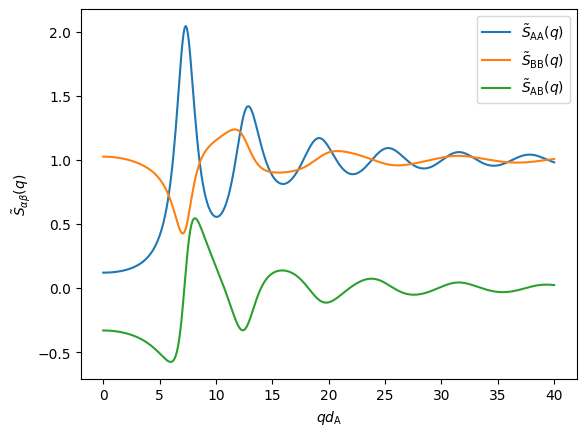

In [9]:
sqmix, cqmix = mixture_Sq.Sq(qgrid)
plt.plot(qgrid,sqmix[:,0,0],label=r'$\tilde S_{\text{AA}}(q)$')
plt.plot(qgrid,sqmix[:,1,1],label=r'$\tilde S_{\text{BB}}(q)$')
plt.plot(qgrid,sqmix[:,0,1],label=r'$\tilde S_{\text{AB}}(q)$')
plt.xlabel(r'$qd_\text{A}$')
plt.ylabel(r'$\tilde S_{\alpha\beta}(q)$')
plt.legend()
plt.show()

In [10]:
mixture_Sq0 = mct.structurefactors.hsmPY(*from_phi_binary(0.515, 0.00001, 0.6))
sqmix0, cqmix0 = mixture_Sq0.Sq(qgrid)

In [11]:
tagged_cq = mct.structurefactors.hssPYtagged(phi=0.515, delta=0.6)
cqs = tagged_cq.cq(qgrid)

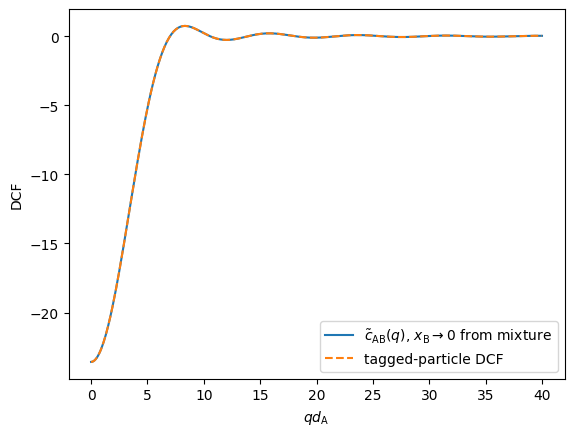

In [12]:
plt.plot(qgrid,cqmix0[:,1,0],label=r'$\tilde c_{\text{AB}}(q)$, $x_\text{B}\to0$ from mixture')
plt.plot(qgrid,cqs,label=r'tagged-particle DCF',linestyle='dashed')
plt.xlabel(r'$qd_\text{A}$')
plt.ylabel(r'DCF')
plt.legend()
plt.show()

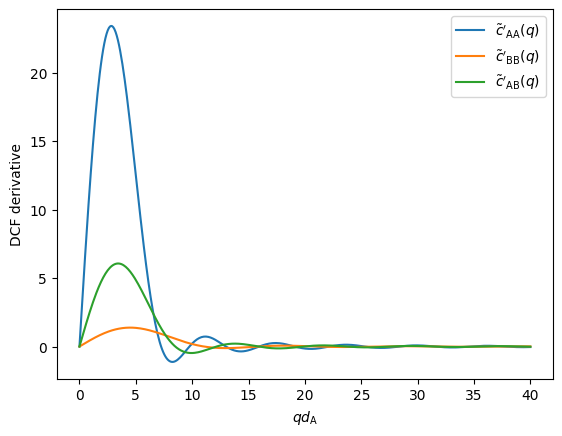

In [13]:
mix_dc = mixture_Sq.dcq_dq(qgrid)
plt.plot(qgrid,mix_dc[:,0,0],label=r"$\tilde c'_\text{AA}(q)$")
plt.plot(qgrid,mix_dc[:,1,1],label=r"$\tilde c'_\text{BB}(q)$")
plt.plot(qgrid,mix_dc[:,0,1],label=r"$\tilde c'_\text{AB}(q)$")
plt.xlabel(r'$qd_\text{A}$')
plt.ylabel('DCF derivative')
plt.legend()
plt.show()

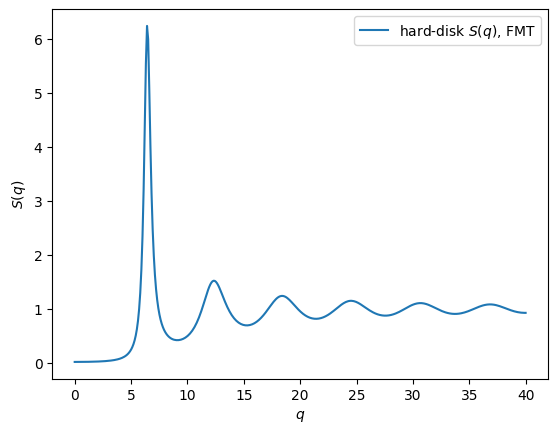

In [14]:
fmtSq = mct.structurefactors.hssFMT2d(0.6949)
qgrid2d = np.linspace(0,40,400)
sq2d, cq2d = fmtSq.Sq(qgrid)
plt.plot(qgrid2d,sq2d,label=r'hard-disk $S(q)$, FMT')
plt.xlabel(r'$q$')
plt.ylabel(r'$S(q)$')
plt.legend()
plt.show()

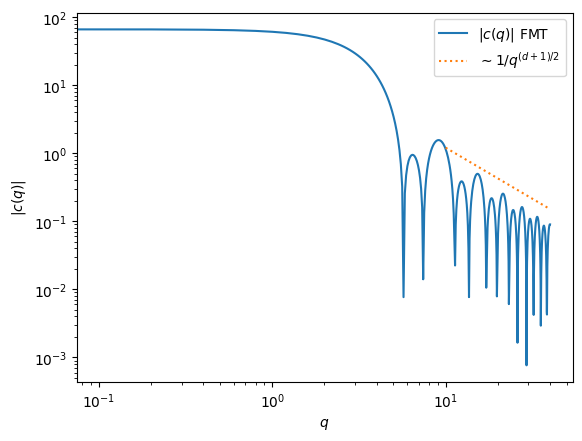

In [15]:
plt.plot(qgrid2d,np.abs(cq2d),label=r'$|c(q)|$ FMT')
q2=np.linspace(10,40,20)
plt.plot(q2,np.max(np.abs(cq2d[25:]))*q2**-1.5,linestyle='dotted',label=r'$\sim1/q^{(d+1)/2}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$q$')
plt.ylabel(r'$|c(q)|$')
plt.legend()
plt.show()